<a href="https://colab.research.google.com/github/FelipeFerAl/SignalsTheory/blob/main/TareaEstimaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias y Señal Original

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
#Frecuencia angular general y vector de tiempo
f1 = 1
f2 = 3
f3 = 5

w = 2*np.pi
T = 3
N = 1024
t = np.linspace(0,T,N)
fs = N/T

#Señales particulares
x1 = np.cos(w*t*f1)
x2 = 1/3*(np.sin(w*t*f2))
x3 = 1/5*(np.sin(w*t*f3))

#Señal original para la red
xt = x1-x2+x3

#Transformada de la señal original
fr, xt_trans = sig.welch(xt,fs=fs,nperseg=1024)

<ipython-input-65-10030fe78b21>:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10**-9,0)


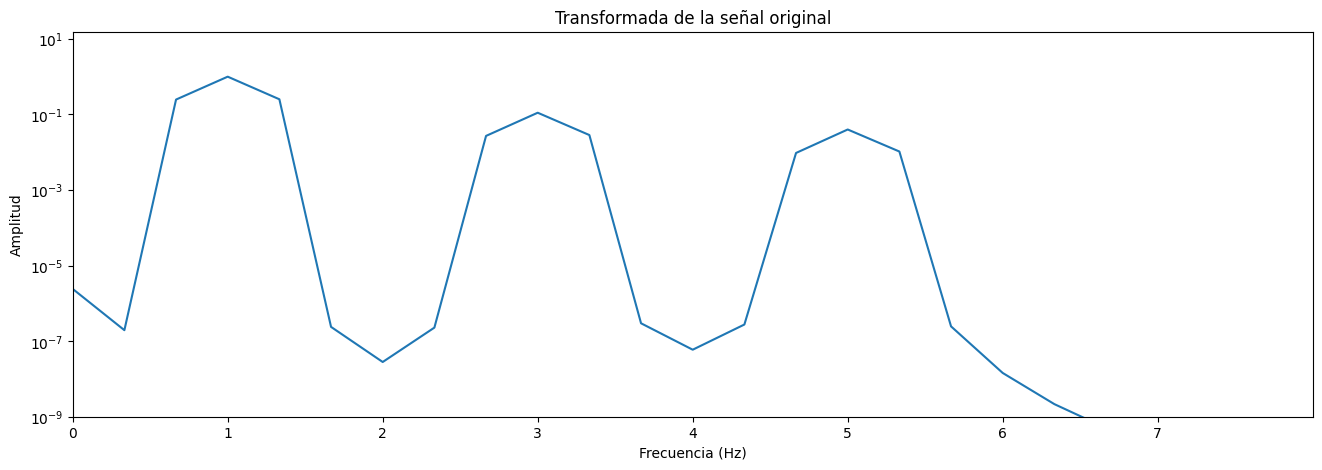

In [ ]:
plt.figure(figsize=(16,5))
plt.semilogy(fr,xt_trans)
plt.xlim(0,8)
plt.xticks(np.arange(0,8,1))
plt.ylim(10**-9,0)
plt.title('Transformada de la señal original')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

# Función generadora de la matriz de entrada
Con esta función generamos no solo el ruido en sus 5 diferentes niveles, sino que  se realiza la suma con la señal original para generar la matriz que ingresará a la red

In [ ]:
def gen_noise_01(mean=0, std=0.1, size=1024, num_signals=350,fs=fs):
    H = []

    for i in range(0,num_signals,1):
      noise = np.random.normal(0, std, size)
      noisy_signal = xt + noise
      H.append(noisy_signal)
    return np.array(H)

def gen_noise_05(mean=0, std=0.5, size=1024, num_signals=350, fs=fs):
    H = []

    for i in range(0,num_signals,1):
      noise = np.random.normal(0, std, size)
      noisy_signal = xt + noise
      H.append(noisy_signal)
    return np.array(H)

def gen_noise_1(mean=0, std=1, size=1024, num_signals=300, fs=fs):
    H = []

    for i in range(0,num_signals,1):
      noise = np.random.normal(0, std, size)
      noisy_signal = xt + noise
      H.append(noisy_signal)
    return np.array(H)

# Generación de la matriz de entrada y salida
Generamos la matriz de entrada con la función de ruido, luego transformamos esta misma matriz con el método de Welch y obtenemos la matriz que funcionará como la salida de mi modelo

In [ ]:
#Generación de la matriz con señales de ruido
M_ruido_01 = gen_noise_01()
M_ruido_05 = gen_noise_05()
M_ruido_1 = gen_noise_1()

# Transformación de las matrices
fr_01,PSD_01 = sig.welch(M_ruido_01,fs=fs,nperseg=1024)
fr_05,PSD_05 = sig.welch(M_ruido_05,fs=fs,nperseg=1024)
fr_1,PSD_1 = sig.welch(M_ruido_1,fs=fs,nperseg=1024)

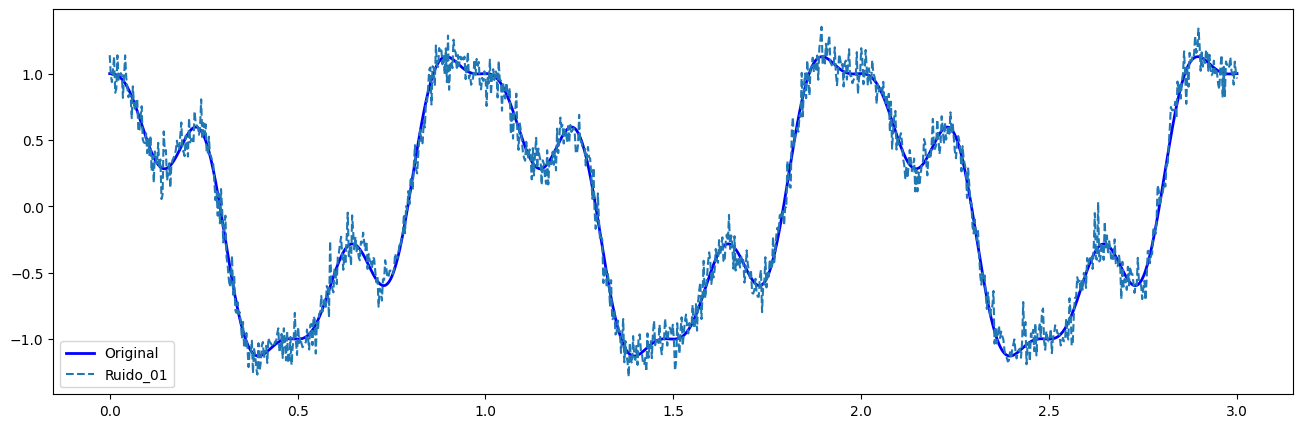

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(t,xt,label='Original',linewidth=2,color='b')
plt.plot(t,M_ruido_01[0],label='Ruido_01',linestyle='--')
# plt.plot(t,M_ruido_05[0],label='Ruido_05',linestyle='--')
# plt.plot(t,M_ruido_1[0],label='Ruido_1',linestyle='--')
plt.legend()
plt.show()

<ipython-input-70-be94e16e800f>:8: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10**-9,0)


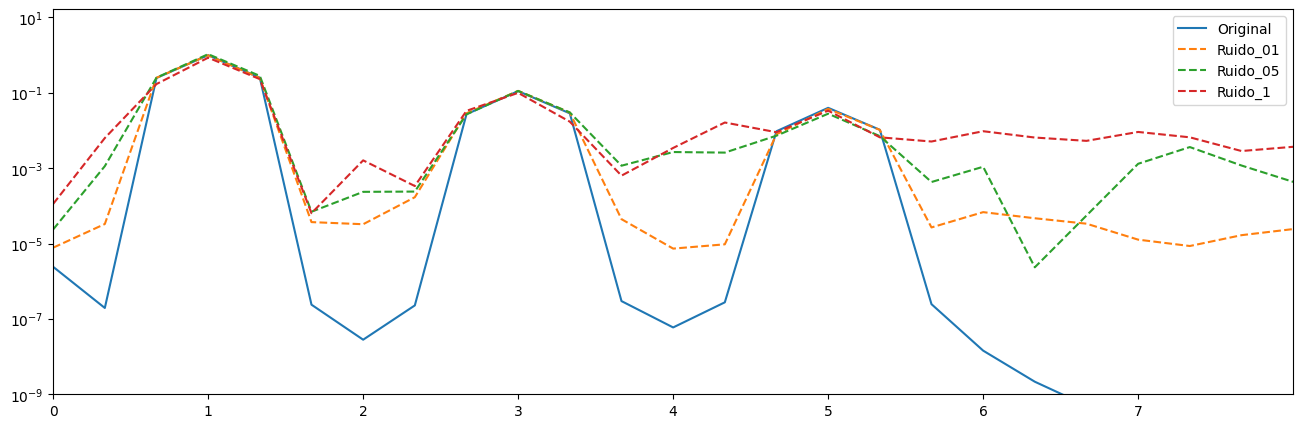

In [ ]:
plt.figure(figsize=(16,5))
plt.semilogy(fr,xt_trans,label='Original')
plt.semilogy(fr_01,PSD_01[0],label='Ruido_01',linestyle='--')
plt.semilogy(fr_05,PSD_05[0],label='Ruido_05',linestyle='--')
plt.semilogy(fr_1,PSD_1[0],label='Ruido_1',linestyle='--')
plt.xlim(0,8)
plt.xticks(np.arange(0,8,1))
plt.ylim(10**-9,0)
plt.legend()
plt.show()

# Preparación de datos

# Planteamiento de los modelos

In [ ]:
model=Sequential([
    Dense(256,activation='relu',input_shape=(1024,)),
    Dense(512,activation='relu'),
    Dense(513,activation='linear')
])
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt,loss='mse',metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history_01 = model_01.fit(x_train_01, y_train_01, epochs=30, validation_split=0.2)

Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.0089 - loss: 0.0783 - val_accuracy: 0.0000e+00 - val_loss: 0.0408
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0104 - loss: 0.0365 - val_accuracy: 0.0000e+00 - val_loss: 0.0304
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0067 - loss: 0.0277 - val_accuracy: 0.0000e+00 - val_loss: 0.0254
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0070 - loss: 0.0237 - val_accuracy: 0.0071 - val_loss: 0.0239
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0092 - loss: 0.0226 - val_accuracy: 0.0071 - val_loss: 0.0234
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0221 - loss: 0.0221 - val_accuracy: 0.0143 - val_loss: 0.0232
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0181 - loss: 0.0219 - val_accuracy: 0.0071 - val_loss: 0.0231
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0174 - loss: 0.0218 - val_accuracy

In [ ]:
model_01.evaluate(x_test_01,y_test_01)

y_01 = model_01.predict(x_test_01)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0022 - loss: 0.0299     
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


In [ ]:
# c1 = scaler_y.inverse_transform(y_01)
# y_test_01 = scaler_y.inverse_transform(y_test_01)

In [ ]:
MSE = np.mean((y_test_01[5]-y_01[5])**2)
MSE

0.03383621328092445

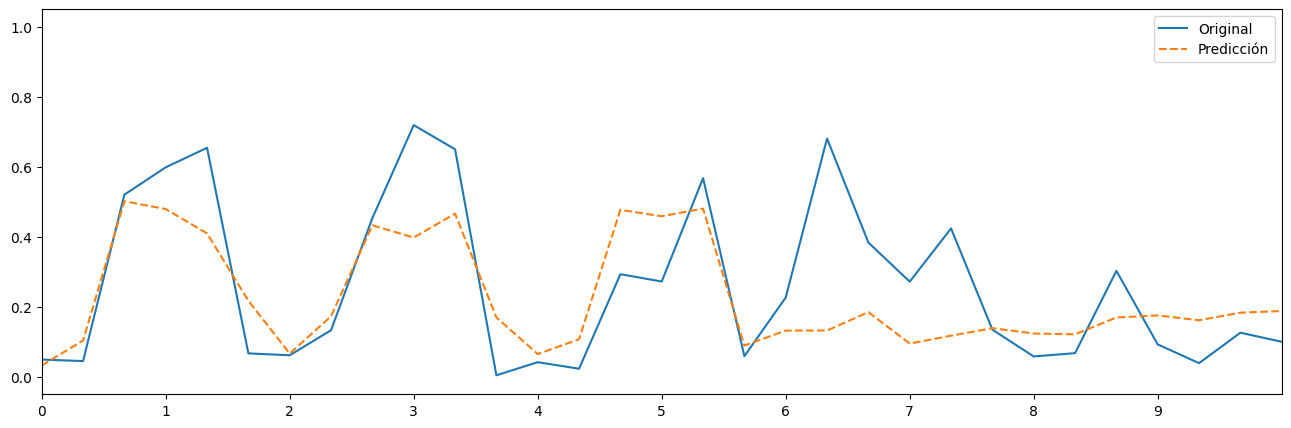

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(fr,y_test_01[5],label='Original')
plt.plot(fr,y_01[5],label='Predicción',linestyle='--')
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1))
plt.legend()
plt.show()

In [ ]:
history_1 = model_1.fit(x_train_1, y_train_1, epochs=20, validation_split=0.2)

In [ ]:
history_10 = model_10.fit(x_train_10, y_train_10, epochs=20, validation_split=0.2)